In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
import helper_400

%load_ext autoreload
%autoreload 2
helper_400.set_sns_style()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Figure size 800x600 with 0 Axes>

In [3]:
%load_ext lab_black

In [4]:
import geopandas as gpd

data = gpd.read_file("outputs/hotspot_vind_censustract_wc.geojson")

In [6]:
df = data
df["E_AGEMID"] = df["E_TOTPOP"] - df[["E_AGE65", "E_AGE17"]].sum(axis=1)

In [7]:
age_cols = ["E_AGE65", "E_AGE17", "E_AGEMID"]

In [9]:
import plotting

hspts = plotting.get_hotspot_list()

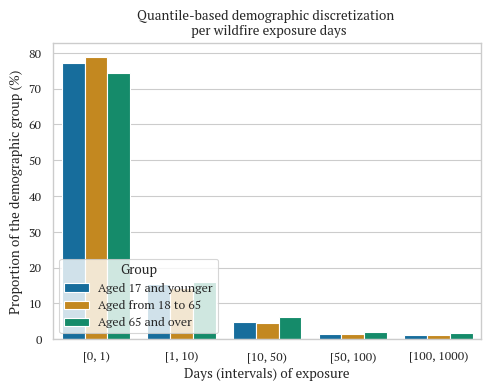

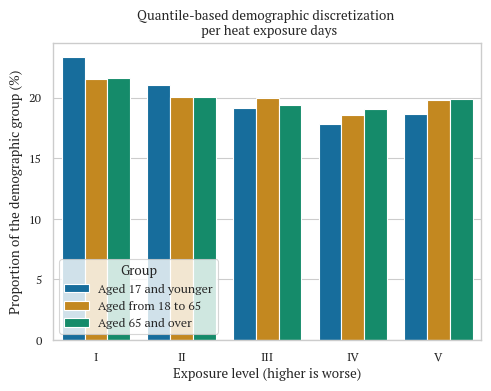

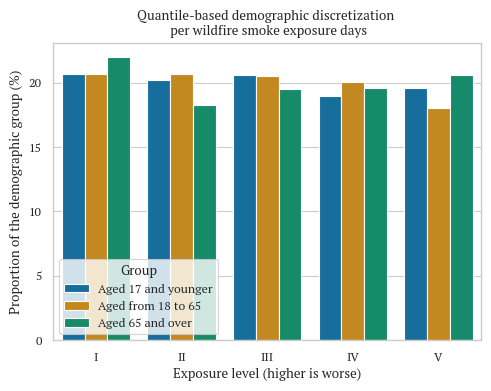

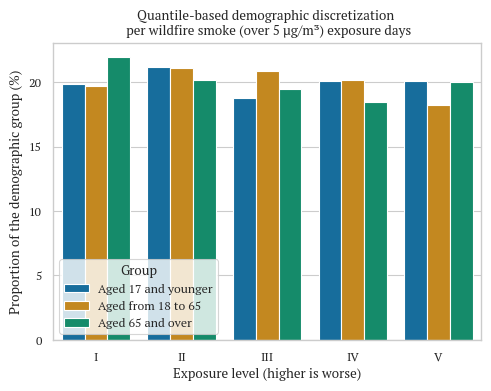

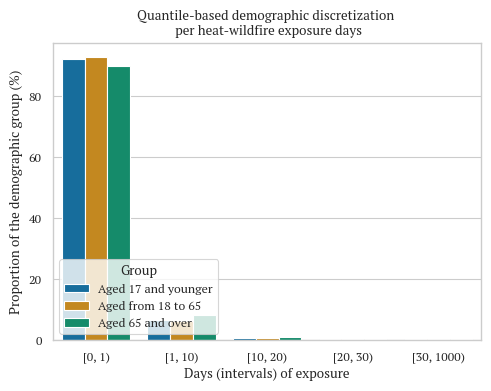

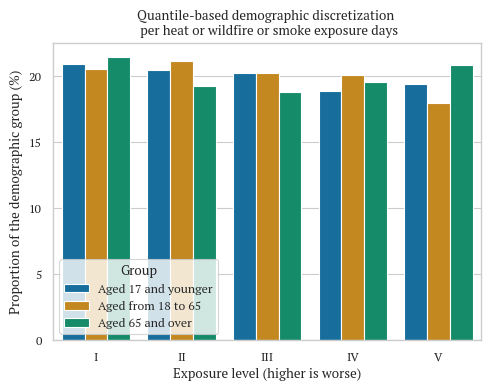

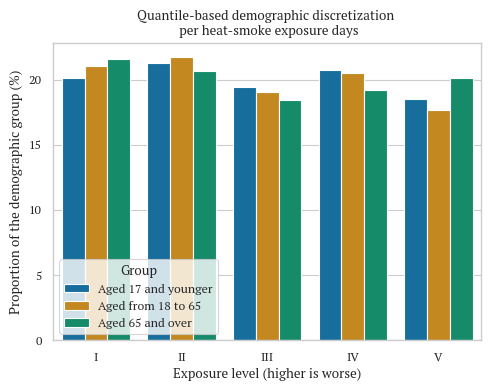

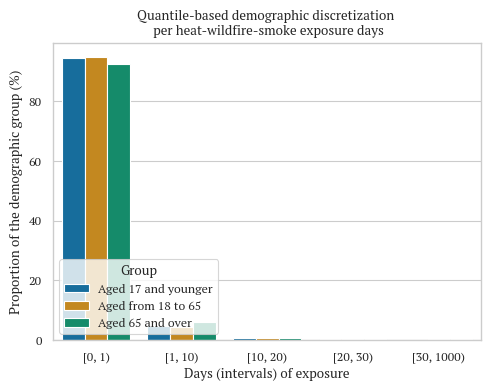

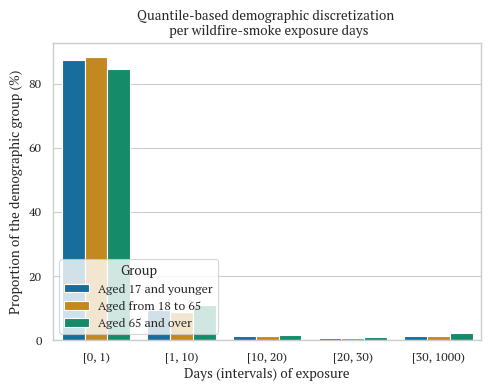

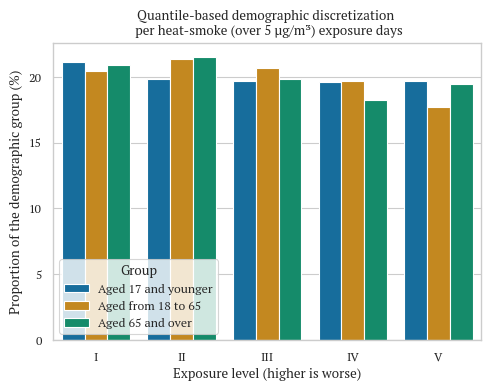

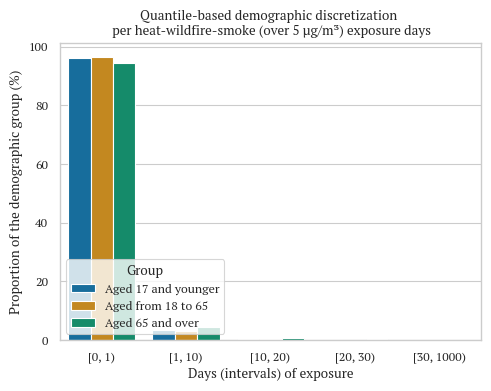

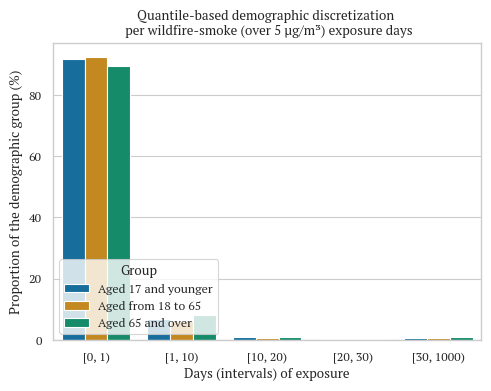

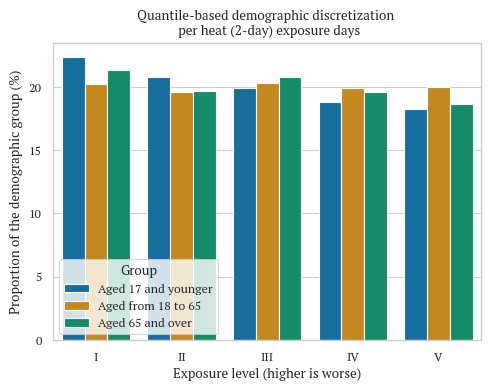

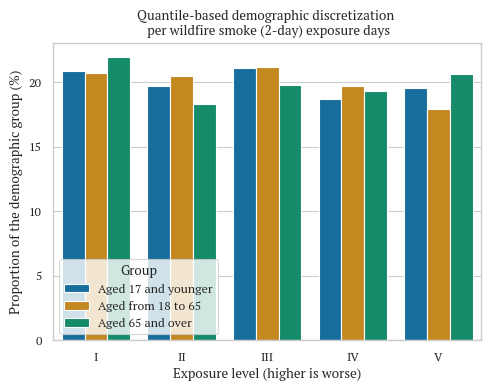

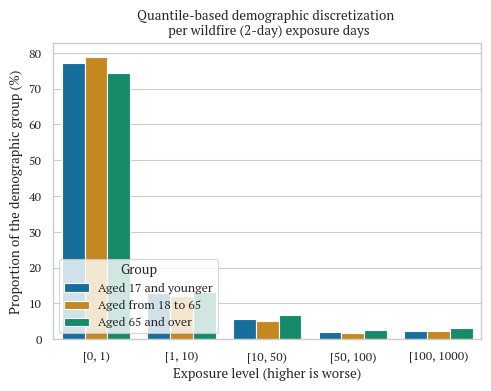

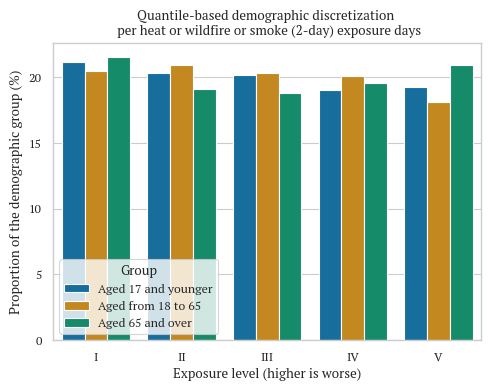

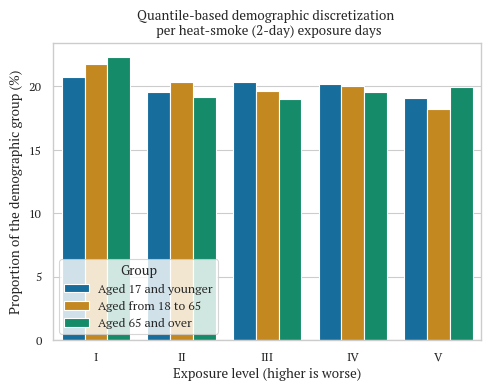

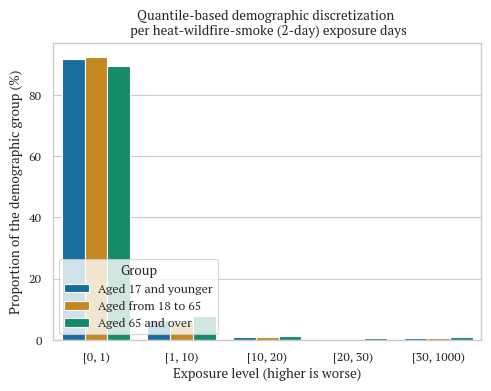

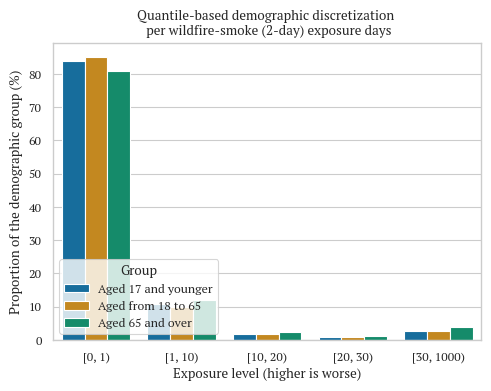

In [13]:
for hspt in hspts:
    # print(hspt)
    df["exposure_category"] = helper_400.get_cut_vars(hspt, df[hspt])

    exposure_per_category = df.groupby("exposure_category")[age_cols].sum()

    for dc in age_cols:
        exposure_per_category[dc + "_normalized"] = (
            exposure_per_category[dc] * 100 / exposure_per_category[dc].sum()
        )

    exposure_per_category = exposure_per_category.drop(columns=age_cols)

    exposure_per_category = exposure_per_category.rename(
        columns={
            "E_AGE65_normalized": "Aged 65 and over",
            "E_AGE17_normalized": "Aged 17 and younger",
            "E_AGEMID_normalized": "Aged from 18 to 65",
        }
    )
    exposure_per_category = exposure_per_category[
        ["Aged 17 and younger", "Aged from 18 to 65", "Aged 65 and over"]
    ]
    helper_400.plot_qbar(
        exposure_per_category, hspt, figname="age", legloc="lower left"
    )